In [24]:
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [25]:
np.random.seed(0)

In [26]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()


In [27]:
print('x train shape:',X_train.shape)
print('x test shape,',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (60000, 28, 28)
x test shape, (10000, 28, 28)
y train shape (60000,)
y test shape (10000,)


In [28]:
assert(X_train.shape[0] == y_train.shape[0]),'the number of image is not equal to the number of labels'
assert(X_test.shape[0] == y_test.shape[0]),'the number of image is not equal to the number of labels'
assert(X_train.shape[1:] == (28,28)),"The dimension of the images are not 28x28" #pixels representation start at index 1 i.e. (60000,28,28)
assert(X_test.shape[1:] == (28,28)),"The dimension of the images are not 28x28"

#The assert keyword lets you test if a condition in your code returns True, if not, the program will raise an AssertionError.



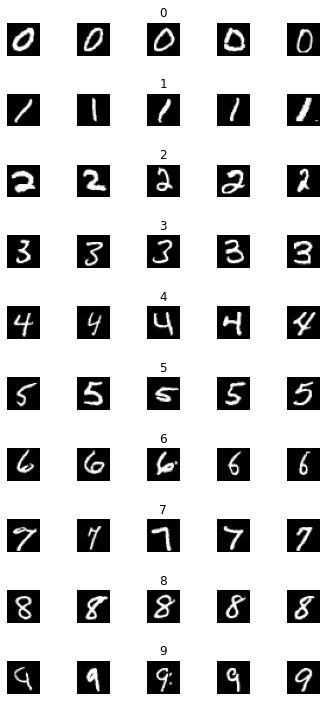

In [29]:
num_of_samples = []
cols = 5
num_classes = 10 #rows

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()#it doesm't lets plot overlap

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train ==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap = plt.get_cmap("gray"))
                #with imshow(x_selected) we plot image which corresponds to rows and colms that is being iterated through
        #after that we will plot randomly selected image which corresponds to current iteration to the current class
        #for each class j being iterated through access a random image from first dimension and then display full 28x28 dimension
        #range is from 0 to last images i.e x_selected-1
        axs[j][i].axis("off")

        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
            #to return number on the middle f row i.e j =2


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'number of images')

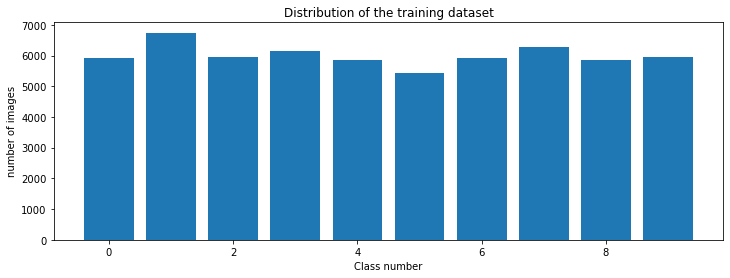

In [31]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("number of images")

In [32]:
#one hot encoding
y_train = to_categorical(y_train,10) #converts class vector to binary class matrix
y_test = to_categorical(y_test,10)

In [33]:
#normalization process
X_train = X_train/255
X_test = X_test/255
#we have divides by 255 because we have 255 color in rgb

In [35]:

#Now flattening fig 28x28 into 784pixels of 1d array
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [39]:
def create_model():
    model  = Sequential()
    model.add(Dense(10,input_dim = num_pixels,activation="relu"))#This is hidden layer
    model.add(Dense(10,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))#This is output layer
    model.compile(Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['accuracy'])
    return model

In [40]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
history = model.fit(X_train, y_train, validation_split=0.1 , epochs =10, verbose = 1,batch_size = 200,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 23us/step - loss: 1.4353 - accuracy: 0.4783 - val_loss: 0.8052 - val_accuracy: 0.7433
Epoch 2/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.7231 - accuracy: 0.7660 - val_loss: 0.5402 - val_accuracy: 0.8368
Epoch 3/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.5619 - accuracy: 0.8281 - val_loss: 0.4287 - val_accuracy: 0.8737
Epoch 4/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.4729 - accuracy: 0.8600 - val_loss: 0.3665 - val_accuracy: 0.8918
Epoch 5/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.4220 - accuracy: 0.8768 - val_loss: 0.3405 - val_accuracy: 0.9047
Epoch 6/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.3957 - accuracy: 0.8848 - val_loss: 0.3182 - val_accuracy: 0.9075
Epoch 7/10
54000/54000 [==============================] - 1s 17us/ste

Text(0.5, 0, 'epoch')

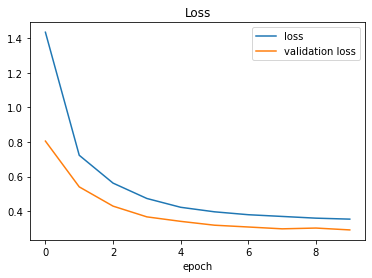

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

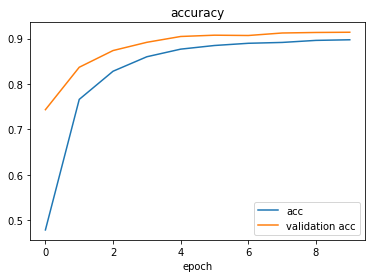

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','validation acc'])
plt.title('accuracy')
plt.xlabel('epoch')

In [44]:
score = model.evaluate(X_test,y_test,verbose = 0)#Returns the loss value & metrics values for the model in test mode.
print(type(score))
print('Test Score:',score[0])
print('Test accuracy',score[1])

<class 'list'>
Test Score: 0.34856371655464174
Test accuracy 0.896399974822998


<Response [200]>


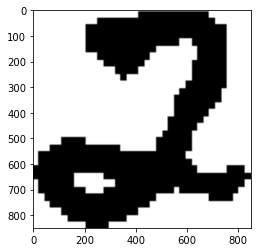

In [50]:
import requests
from PIL import Image #python imaging library
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

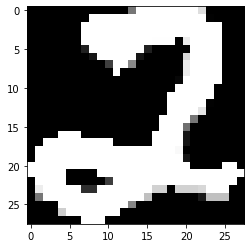

In [53]:
import cv2
#converting arry into size of 28,28

img_array = np.asarray(img)

resized = cv2.resize(img_array,(28,28))
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)#reverting back colors of black and white

plt.imshow(image,cmap=plt.get_cmap("gray"))

In [54]:
image = image/255
image = image.reshape(1,784)

In [56]:
prediction = np.argmax(model.predict(image))
print("predicted digit:",str(prediction))


predicted digit: 0
